In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('FinalData.csv')
df

,a1,a2,a3,a4,load,fault
0,2.350390,1.454870,-1.667080,-2.055610,0.0,F
1,2.452970,1.400100,-2.825100,0.984487,0.0,F
2,-0.241284,-0.267390,0.793540,0.605862,0.0,F
3,1.130270,-0.890918,0.696969,0.613068,0.0,F
4,-1.296140,0.980479,-1.130560,-0.346971,0.0,F
...,...,...,...,...,...,...
2021114,0.677448,-3.234410,-1.725990,-3.143020,0.9,H
2021115,-10.575400,7.725400,-2.184010,2.569650,0.9,H
2021116,-4.033290,2.576920,1.468430,2.728910,0.9,H
2021117,1.868670,-5.089400,5.342290,-1.365630,0.9,H


In [3]:
df  = pd.read_csv('FinalData.csv')

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:,:-2]=scaler.fit_transform(df.iloc[:,:-2])

df

,a1,a2,a3,a4,load,fault
0,0.381468,0.329958,-0.421759,-0.460352,0.0,F
1,0.398126,0.317534,-0.713949,0.220273,0.0,F
2,-0.039401,-0.060712,0.199101,0.135505,0.0,F
3,0.183330,-0.202151,0.174735,0.137119,0.0,F
4,-0.210701,0.222349,-0.286385,-0.077817,0.0,F
...,...,...,...,...,...,...
2021114,0.109795,-0.733740,-0.436623,-0.703804,0.9,H
2021115,-1.717584,1.752341,-0.552190,0.575163,0.9,H
2021116,-0.655194,0.584480,0.369389,0.610819,0.9,H
2021117,0.303240,-1.154518,1.346836,-0.305877,0.9,H


In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [5]:
intake=100
leave=200

X=[]
Y=[]


for k in ['F','H']:
    
    df_temp_1 = df[df['fault']==k]
    
    for j in (np.arange(0,1,0.1)):
        df_temp_2=df_temp_1[df_temp_1['load']==j]

        for i in np.arange(0,len(df_temp_2)-(intake),leave):
            X.append(df_temp_2.iloc[i:i+intake,:-1])
            Y.append(df_temp_2.iloc[i+intake,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [6]:
X.shape

(7138, 100, 5, 1)

In [7]:
Y.shape

(7138,)

In [23]:
X

array([[[[ 3.81468021e-01],
         [ 3.29958243e-01],
         [-4.21759229e-01],
         [-4.60351774e-01],
         [ 0.00000000e+00]],

        [[ 3.98126251e-01],
         [ 3.17534432e-01],
         [-7.13949407e-01],
         [ 2.20272852e-01],
         [ 0.00000000e+00]],

        [[-3.94005917e-02],
         [-6.07124228e-02],
         [ 1.99101373e-01],
         [ 1.35505327e-01],
         [ 0.00000000e+00]],

        ...,

        [[ 2.81075307e-01],
         [ 4.26034655e-01],
         [ 6.52422314e-01],
         [-3.51835908e-01],
         [ 0.00000000e+00]],

        [[ 1.44590682e-01],
         [ 4.33631394e-01],
         [ 6.23496491e-01],
         [ 2.01136940e-01],
         [ 0.00000000e+00]],

        [[ 5.62963779e-02],
         [ 9.17794809e-01],
         [ 6.86606460e-01],
         [-3.11839571e-03],
         [ 0.00000000e+00]]],


       [[[-4.74902724e-01],
         [ 1.00928686e+00],
         [-1.23933008e-01],
         [-3.33867325e-02],
         [ 0.0000000

In [9]:
Y

array(['F', 'F', 'F', ..., 'H', 'H', 'H'], dtype='<U1')

In [10]:
X.shape[1]

100

In [11]:
X.shape[2]

5

In [12]:
X.shape[0]

7138

c:\users\91978\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7138 samples in 0.012s...
[t-SNE] Computed neighbors for 7138 samples in 1.898s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7138
[t-SNE] Computed conditional probabilities for sample 2000 / 7138
[t-SNE] Computed conditional probabilities for sample 3000 / 7138
[t-SNE] Computed conditional probabilities for sample 4000 / 7138
[t-SNE] Computed conditional probabilities for sample 5000 / 7138
[t-SNE] Computed conditional probabilities for sample 6000 / 7138
[t-SNE] Computed conditional probabilities for sample 7000 / 7138
[t-SNE] Computed conditional probabilities for sample 7138 / 7138
[t-SNE] Mean sigma: 4.793280
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.618462
[t-SNE] KL divergence after 300 iterations: 3.714573


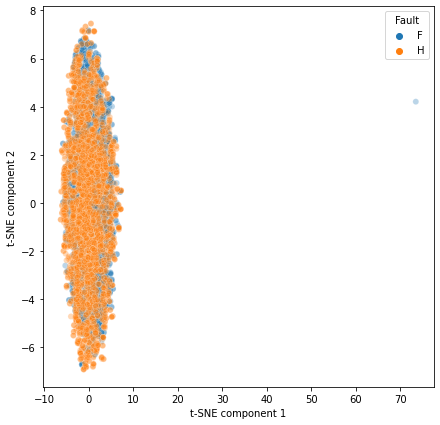

In [13]:
X_pre_cnn = X.reshape(X.shape[0],X.shape[1]*X.shape[2])

from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_cnn)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])

tSNEdf['Fault']=Y


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.3,shuffle=True)

In [15]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
no_classes = 2

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(20, 3),activation='relu',input_shape=(X_train.shape[1],X_train.shape[2],1),padding='same'))

cnn_model.add(MaxPooling2D((20, 2),strides=(5, 5),padding='same'))

cnn_model.add(Conv2D(64, (10, 3), activation='relu',padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(10, 2),strides=(3, 3),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
         
cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 5, 32)        1952      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 1, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 1, 64)         61504     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense (Dense)               (None, 128)               5

In [16]:
batch_size = 128
epochs = 5
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/5
40/40 [==============================] - 3s 53ms/step - loss: 0.2364 - accuracy: 0.9163 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/5
40/40 [==============================] - 2s 49ms/step - loss: 6.2575e-04 - accuracy: 1.0000 - val_loss: 3.4747e-04 - val_accuracy: 1.0000
Epoch 3/5
40/40 [==============================] - 2s 49ms/step - loss: 2.2336e-04 - accuracy: 1.0000 - val_loss: 2.0423e-04 - val_accuracy: 1.0000
Epoch 4/5
40/40 [==============================] - 2s 51ms/step - loss: 1.3764e-04 - accuracy: 1.0000 - val_loss: 1.6266e-04 - val_accuracy: 1.0000
Epoch 5/5
40/40 [==============================] - 2s 48ms/step - loss: 1.0671e-04 - accuracy: 1.0000 - val_loss: 1.2946e-04 - val_accuracy: 1.0000


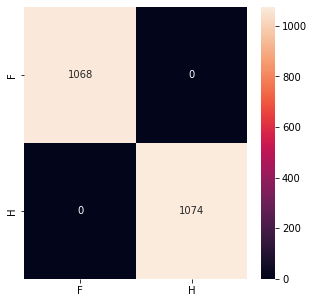

In [17]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred

y_pred=cnn_model.predict(X_test)
Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,5))
cm = confusion_matrix(Y_test, Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d',xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [36]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[5].output)
y_viz = dummy_cnn.predict(X_train)

In [37]:
y_viz.shape

(4996, 128)

c:\users\91978\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4996 samples in 0.002s...
[t-SNE] Computed neighbors for 4996 samples in 0.895s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4996
[t-SNE] Computed conditional probabilities for sample 2000 / 4996
[t-SNE] Computed conditional probabilities for sample 3000 / 4996
[t-SNE] Computed conditional probabilities for sample 4000 / 4996
[t-SNE] Computed conditional probabilities for sample 4996 / 4996
[t-SNE] Mean sigma: 0.560420
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.253983
[t-SNE] KL divergence after 300 iterations: 1.764528


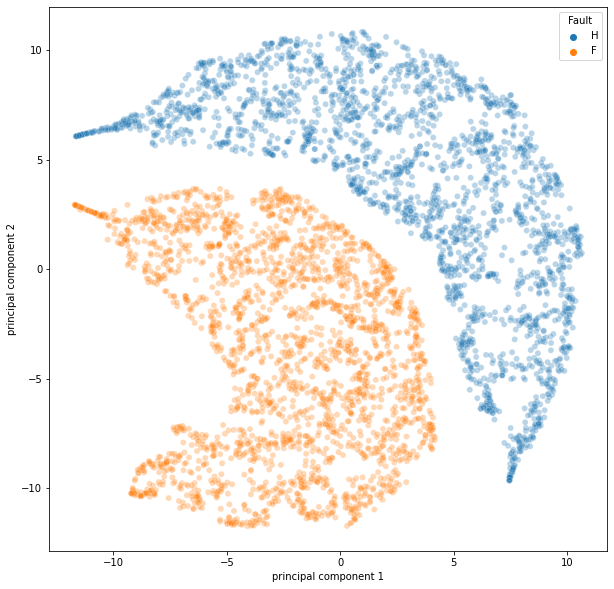

In [38]:
from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['principal component 1', 'principal component 2'])

tSNEdf['Fault']=inv_Transform_result(y_train)



fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['principal component 1'],y=tSNEdf['principal component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

c:\users\91978\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4996 samples in 0.003s...
[t-SNE] Computed neighbors for 4996 samples in 0.888s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4996
[t-SNE] Computed conditional probabilities for sample 2000 / 4996
[t-SNE] Computed conditional probabilities for sample 3000 / 4996
[t-SNE] Computed conditional probabilities for sample 4000 / 4996
[t-SNE] Computed conditional probabilities for sample 4996 / 4996
[t-SNE] Mean sigma: 0.886220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.298607
[t-SNE] KL divergence after 300 iterations: 1.885920


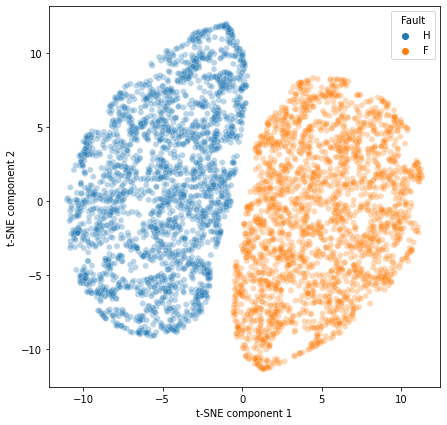

In [21]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[4].output)
y_viz = dummy_cnn.predict(X_train)








from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])

tSNEdf['Fault']=inv_Transform_result(y_train)


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [39]:
y_viz.shape

(4996, 128)